https://github.com/UncleGedd/COVID19-EDA/blob/master/COVID-19%20Viz.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#hide
import requests
import io
import os

os.environ['NO_PROXY'] = 'raw.githubusercontent.com'

def load_timeseries(name, 
                    base_url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'):
    # Thanks to kasparthommen for the suggestion to directly downloadCSSEGISandData
    #time_series_covid19_confirmed_global.csv
    url = f'{base_url}/time_series_covid19_{name}_global.csv'
    print(url)
    csv = requests.get(url).text
    df = pd.read_csv(io.StringIO(csv))
    return df



In [3]:
df_confirmed = load_timeseries('confirmed')
df_deaths = load_timeseries('deaths')
#recovered ne somble plus dispo
#df_recovered = load_timeseries('Recovered')
df_confirmed.head()

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [4]:
df_confirmed['Country/Region'].value_counts()

China             33
Canada            13
France            10
Australia          8
United Kingdom     7
                  ..
Belgium            1
Niger              1
Tunisia            1
Cambodia           1
Germany            1
Name: Country/Region, Length: 170, dtype: int64

In [5]:
sorted(df_confirmed['Country/Region'].unique())[:5]


['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

In [6]:
euro = [
'Austria',
'Belarus',
'Belgium',
'Bosnia and Herzegovina',
'Bulgaria',
'Croatia',
'Cyprus',
'Czechia',
'Denmark',
'Estonia',
'Finland',
'France',
'Germany',
'Greece',
'Hungary',
'Ireland',
'Italy',
'Latvia',
'Liechtenstein',
'Lithuania',
'Luxembourg',
'Malta',
'Monaco',
'Moldova',
'Netherlands',
'North Macedonia',
'Norway',
'Poland',
'Portugal',
'Romania',
'Serbia',
'Slovakia',
'Slovenia',
'Spain',
'Sweden',
'Switzerland',
'Ukraine',
'United Kingdom'
]

In [7]:
# sum daily data for a particular list of counties
def preprocess_sum(df, countries):
    df_country = df[df['Country/Region'].isin(countries)].drop(df.columns[0:4], axis=1)
    df_country = df_country.apply(lambda c: np.sum(c), axis=0) # returns a series
    dates, ts_data = list(map(lambda i: i[:-3], df_country.index)), list(df_country)
    return dates, ts_data

In [8]:
# get daily counts of new events (infections, recoveries, deaths)
def preprocess_daily_new(df, countries):
    df_country = df[df['Country/Region'].isin(countries)].drop(df.columns[0:4], axis=1)
    df_country = df_country.apply(lambda c: np.sum(c), axis=0).diff() # returns a series
    dates, ts_data = list(map(lambda i: i[:-3], df_country.index[1:])), list(df_country)[1:]
    return dates, ts_data

# China

Time series of infections in China

In [9]:

dates, ts_infections_china = preprocess_sum(df_confirmed, ['China'])
_, ts_deaths_china = preprocess_sum(df_deaths, ['China'])
#_, ts_recovered_china = preprocess_sum(df_recovered, ['China'])

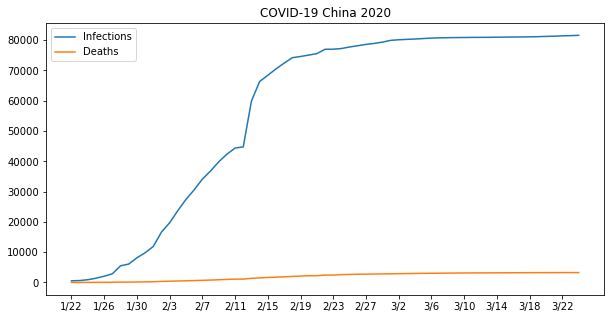

In [10]:
plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_china, label="Infections")
plt.plot(dates, ts_deaths_china, label="Deaths")
#plt.plot(dates, ts_recovered_china, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 China 2020')
plt.show()

New infections, deaths, recovered



In [11]:
dates, daily_infections_china = preprocess_daily_new(df_confirmed, ['China'])
_, daily_deaths_china = preprocess_daily_new(df_deaths, ['China'])
#_, daily_recovered_china = preprocess_daily_new(df_recovered, ['China'])

In [12]:
df_new_events_china =  pd.DataFrame([daily_infections_china, daily_deaths_china], 
                                    columns=dates, index=['Infections', 'Deaths'])
df_new_events_china.head()

,1/23,1/24,1/25,1/26,1/27,1/28,1/29,1/30,1/31,2/1,...,3/15,3/16,3/17,3/18,3/19,3/20,3/21,3/22,3/23,3/24
Infections,95.0,277.0,486.0,669.0,802.0,2632.0,578.0,2054.0,1661.0,2089.0,...,26.0,30.0,25.0,44.0,54.0,94.0,55.0,130.0,63.0,93.0
Deaths,1.0,8.0,16.0,14.0,26.0,49.0,2.0,38.0,42.0,46.0,...,10.0,14.0,13.0,11.0,8.0,4.0,6.0,15.0,0.0,7.0


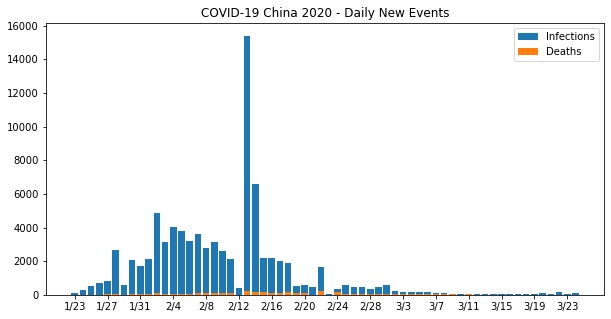

In [13]:
plt.figure(figsize=(10,5))
plt.bar(dates, daily_infections_china, label="Infections", 
        bottom=np.array(daily_deaths_china))
plt.bar(dates, daily_deaths_china, label="Deaths")
#plt.bar(dates, daily_recovered_china, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 China 2020 - Daily New Events')
plt.show()

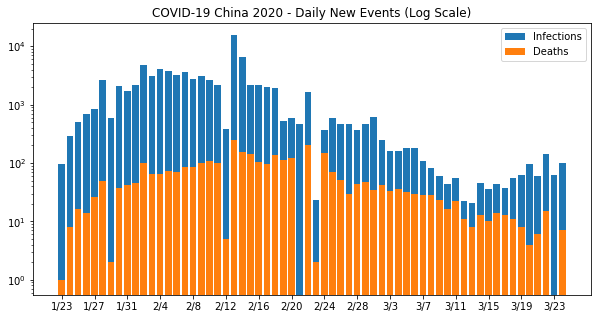

In [14]:
plt.figure(figsize=(10,5))
plt.bar(dates, daily_infections_china, label="Infections", 
        bottom=np.array(daily_deaths_china), log=True)
plt.bar(dates, daily_deaths_china, label="Deaths", log=True)
#plt.bar(dates, daily_recovered_china, label="Recovered", log=True)
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 China 2020 - Daily New Events (Log Scale)')
plt.show()

# Europe

Time series of infections in Europe



In [15]:
df_euro = df_confirmed[df_confirmed['Country/Region'].isin(euro)].drop(df_confirmed.columns[0:4], axis=1)
df_euro = df_euro.apply(lambda c: np.sum(c), axis=0) # returns a series
ts_infections_euro = list(df_euro)

In [16]:
dates, ts_infections_euro = preprocess_sum(df_confirmed, euro)
dates, ts_deaths_euro = preprocess_sum(df_deaths, euro)
#dates, ts_recovered_euro = preprocess_sum(df_recovered, euro)

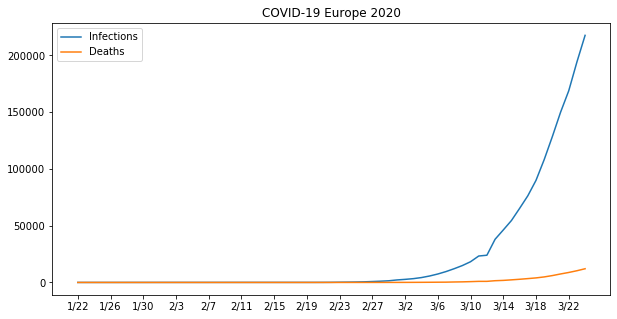

In [17]:
plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_euro, label="Infections")
plt.plot(dates, ts_deaths_euro, label="Deaths")
#plt.plot(dates, ts_recovered_euro, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 Europe 2020')
plt.show()

New infections, deaths, recovered



In [18]:
dates, daily_infections_euro = preprocess_daily_new(df_confirmed, euro)
_, daily_deaths_euro = preprocess_daily_new(df_deaths, euro)
#_, daily_recovered_euro = preprocess_daily_new(df_recovered, euro)

In [19]:
df_new_events_euro =  pd.DataFrame([daily_infections_euro, daily_deaths_euro], 
                                    columns=dates, index=['Infections', 'Deaths'])
df_new_events_euro.head()

,1/23,1/24,1/25,1/26,1/27,1/28,1/29,1/30,1/31,2/1,...,3/15,3/16,3/17,3/18,3/19,3/20,3/21,3/22,3/23,3/24
Infections,0.0,2.0,1.0,0.0,1.0,4.0,2.0,0.0,6.0,5.0,...,8345.0,10725.0,11045.0,13581.0,18249.0,20327.0,21362.0,18916.0,25357.0,23495.0
Deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,477.0,513.0,586.0,616.0,863.0,1184.0,1422.0,1318.0,1523.0,1758.0


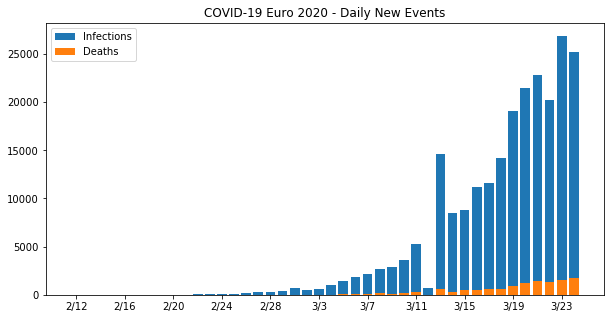

In [20]:
plt.figure(figsize=(10,5))
SKIP=20
plt.bar(dates[SKIP:], daily_infections_euro[SKIP:], label="Infections", 
        bottom=np.array(daily_deaths_euro[SKIP:]))
plt.bar(dates[SKIP:], daily_deaths_euro[SKIP:], label="Deaths")
#plt.bar(dates[SKIP:], daily_recovered_euro[SKIP:], label="Recovered")
plt.xticks(range(0, len(dates[SKIP:]), 4))
plt.legend()
plt.title('COVID-19 Euro 2020 - Daily New Events')
plt.show()

# France

Time series of infections in France

In [21]:

dates, ts_infections_france = preprocess_sum(df_confirmed, ['France'])
_, ts_deaths_france = preprocess_sum(df_deaths, ['France'])
#_, ts_recovered_france = preprocess_sum(df_recovered, ['France'])

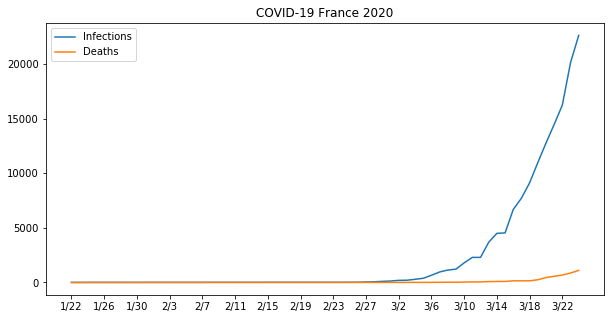

In [22]:
plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_france, label="Infections")
plt.plot(dates, ts_deaths_france, label="Deaths")
#plt.plot(dates, ts_recovered_france, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 France 2020')
plt.show()

New infections, deaths, recovered



In [23]:
dates, daily_infections_france = preprocess_daily_new(df_confirmed, ['France'])
_, daily_deaths_france = preprocess_daily_new(df_deaths, ['France'])
#_, daily_recovered_france = preprocess_daily_new(df_recovered, ['France'])

In [24]:
df_new_events_france =  pd.DataFrame([daily_infections_france, daily_deaths_france], 
                                    columns=dates, index=['Infections', 'Deaths'])
df_new_events_france.head()

,1/23,1/24,1/25,1/26,1/27,1/28,1/29,1/30,1/31,2/1,...,3/15,3/16,3/17,3/18,3/19,3/20,3/21,3/22,3/23,3/24
Infections,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,36.0,2151.0,1032.0,1409.0,1846.0,1788.0,1705.0,1780.0,3880.0,2499.0
Deaths,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,58.0,0.0,0.0,95.0,207.0,112.0,113.0,186.0,240.0


In [25]:
df_new_events_france.T.sum()

Infections    22622.0
Deaths         1102.0
dtype: float64

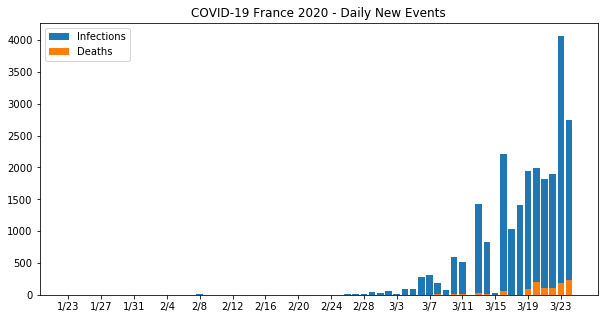

In [26]:
plt.figure(figsize=(10,5))
plt.bar(dates, daily_infections_france, label="Infections", 
        bottom=np.array(daily_deaths_france))
plt.bar(dates, daily_deaths_france, label="Deaths")
#plt.bar(dates, daily_recovered_france, label="Recovered")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 France 2020 - Daily New Events')
plt.show()

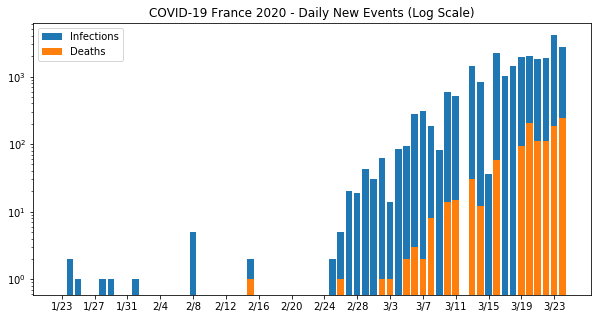

In [27]:
plt.figure(figsize=(10,5))
plt.bar(dates, daily_infections_france, label="Infections", 
        bottom=np.array(daily_deaths_france), log=True)
plt.bar(dates, daily_deaths_france, label="Deaths", log=True)
#plt.bar(dates, daily_recovered_france, label="Recovered", log=True)
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 France 2020 - Daily New Events (Log Scale)')
plt.show()

# Plotting France vs China

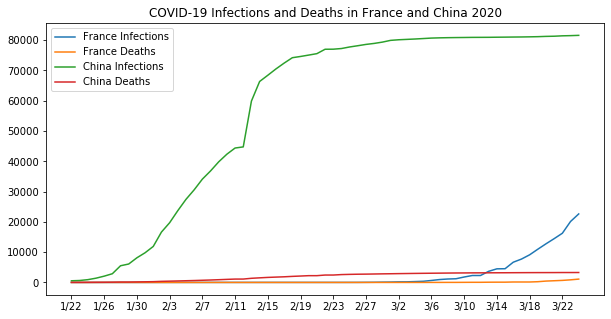

In [28]:
dates,_ = preprocess_sum(df_confirmed, ['France']) # ensure proper date range

plt.figure(figsize=(10,5))
plt.plot(dates, ts_infections_france, label="France Infections")
plt.plot(dates, ts_deaths_france, label="France Deaths")

plt.plot(dates, ts_infections_china, label="China Infections")
plt.plot(dates, ts_deaths_china, label="China Deaths")
plt.xticks(range(0, len(dates), 4))

plt.legend()
plt.title('COVID-19 Infections and Deaths in France and China 2020')
plt.show()

Closer look at death rates

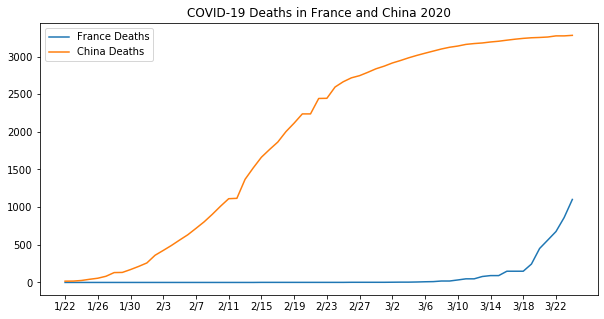

In [29]:

plt.figure(figsize=(10,5))
plt.plot(dates, ts_deaths_france, label="France Deaths")
plt.plot(dates, ts_deaths_china, label="China Deaths")
plt.xticks(range(0, len(dates), 4))
plt.legend()
plt.title('COVID-19 Deaths in France and China 2020')
plt.show()